# 2019/02/20    - test campaign 2, day 8

##    5.3 Optimize M3 figure using LSST bending modes 1-7 only with 25% horizon forces applied (4 iterations, M1-M3-M1 measured)
##    5.4 Optimize M1-M3-M1 figure using LSST bending modes and new baseline forces (4 iterations)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190220

<Figure size 432x288 with 0 Axes>

### Start with optimized forces + 1/4 horizon forces. Ready for optimization using 7 ML modes

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-3 7 ML Modes/M1 set0 190220 5-3.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 7 ML Modes/M3 set0 190220 5-3.h5: Wed Feb 20 09:10:15 2019 


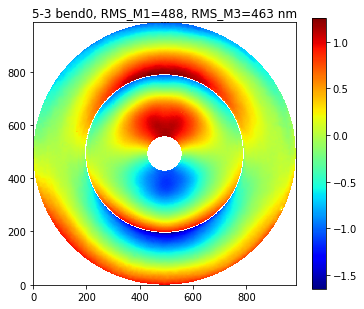

In [5]:
testID = '5-3'
iter = ' 7 ML Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

## Optimize away! It turned out to be bad...

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-3 Bad/M1 set0 190220 5-3.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 Bad/M3 set0 190220 5-3.h5: Wed Feb 20 09:10:15 2019 
5-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190220_5-3 Bad/M1 set1 190220 5-3.h5: Wed Feb 20 10:13:05 2019 
/Processed/190220_5-3 Bad/M3 set1 190220 5-3.h5: Wed Feb 20 10:05:02 2019 


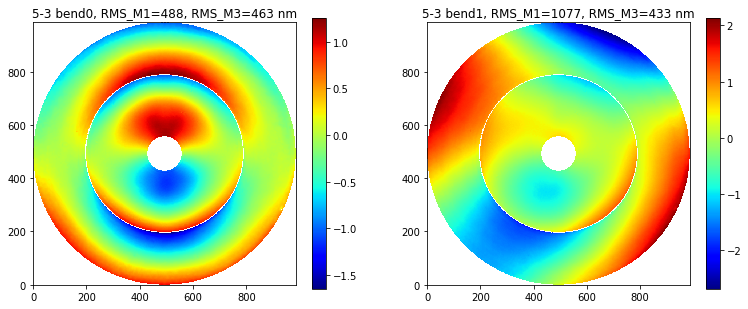

In [8]:
testID = '5-3'
iter = ' Bad'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
       
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-1])    

### Then we tried 7 LSST modes. Again, start with this.

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-3 7 LSST Modes/M1 set0 190220 5-3.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 7 LSST Modes/M3 set0 190220 5-3.h5: Wed Feb 20 09:10:15 2019 


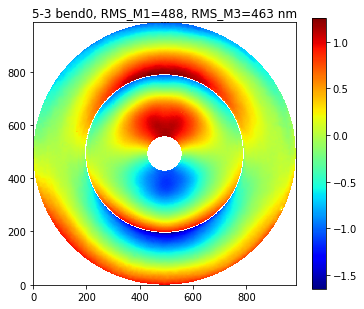

In [2]:
testID = '5-3'
iter = ' 7 LSST Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

### Still, doesn't work

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-3 7 LSST Modes Optimized/M1 set0 190220 5-3.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 7 LSST Modes Optimized/M3 set0 190220 5-3.h5: Wed Feb 20 09:10:15 2019 
5-3 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190220_5-3 7 LSST Modes Optimized/M1 set1 190220 5-3.h5: Wed Feb 20 11:53:53 2019 
/Processed/190220_5-3 7 LSST Modes Optimized/M3 set1 190220 5-3.h5: Wed Feb 20 11:52:46 2019 
5-3 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190220_5-3 7 LSST Modes Optimized/M1 set2 190220 5-3.h5: Wed Feb 20 12:21:55 2019 
/Processed/190220_5-3 7 LSST Modes Optimized/M3 set2 190220 5-3.h5: Wed Feb 20 12:22:26 2019 
5-3 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190220_5-3 7 LSST Modes Optimized/M1 set3 190220 5-3.h5: Wed Feb 20 12:55:19 2019 
/Processed/190220_5-3 7 LSST Modes Optimized/M3 set3 190220 5-3.h5: Wed Fe

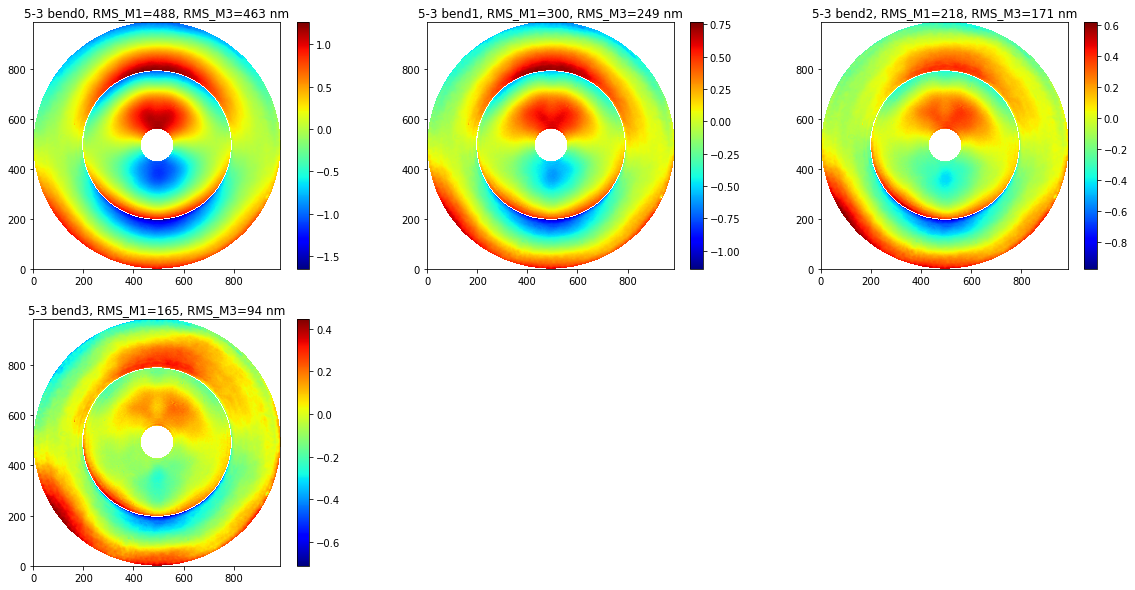

In [4]:
testID = '5-3'
iter = ' 7 LSST Modes Optimized'
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

### Didn't work. Now we only do predictions, without putting the predicted forces on.
### with 16 LSST modes

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190220_5-3 16 LSST Modes/M1M3 set0 190220 5-3M1M3 fit -16modes.h5
/Processed/190220_5-3 16 LSST Modes/M1M3 set0 190220 5-3M1M3 fit -16modes.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 16 LSST Modes/M1M3 set0 190220 5-3M1M3 fit -16modes.h5: Wed Feb 20 09:10:15 2019 


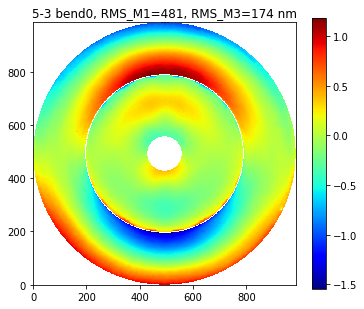

In [12]:
testID = '5-3'
iter = ' 16 LSST Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit -16modes.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

### Prediction with 16 ML modes

5-3 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-3 16 ML Modes/M1M3 set0 190220 5-3M1M3 fit -16modes.h5: Wed Feb 20 09:07:14 2019 
/Processed/190220_5-3 16 ML Modes/M1M3 set0 190220 5-3M1M3 fit -16modes.h5: Wed Feb 20 09:10:15 2019 


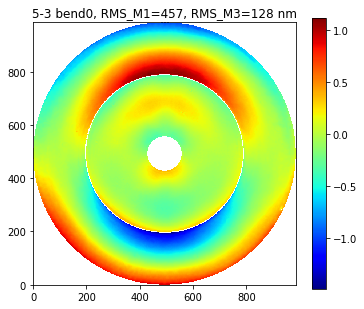

In [13]:
testID = '5-3'
iter = ' 16 ML Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit -16modes.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-2])    
fig.delaxes(ax.flatten()[-1])    

### Going back to surface optimization
Bo adjusted 4 quads and 8 neighbors. But the input to the analysis was wrong because of a miscommunication with Buddy wrt the coordinate system of the h5 maps.
The +y and -y needed to be swaped.

5-4 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-4a/M1 set0 190220 5-4.h5: Wed Feb 20 13:38:06 2019 
/Processed/190220_5-4a/M3 set0 190220 5-4.h5: Wed Feb 20 13:38:19 2019 
5-4 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190220_5-4a/M1 set1 190220 5-4.h5: Wed Feb 20 14:00:27 2019 
/Processed/190220_5-4a/M3 set1 190220 5-4.h5: Wed Feb 20 13:59:47 2019 
5-4 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190220_5-4a/M1 set2 190220 5-4.h5: Wed Feb 20 14:27:32 2019 
/Processed/190220_5-4a/M3 set2 190220 5-4.h5: Wed Feb 20 14:26:13 2019 


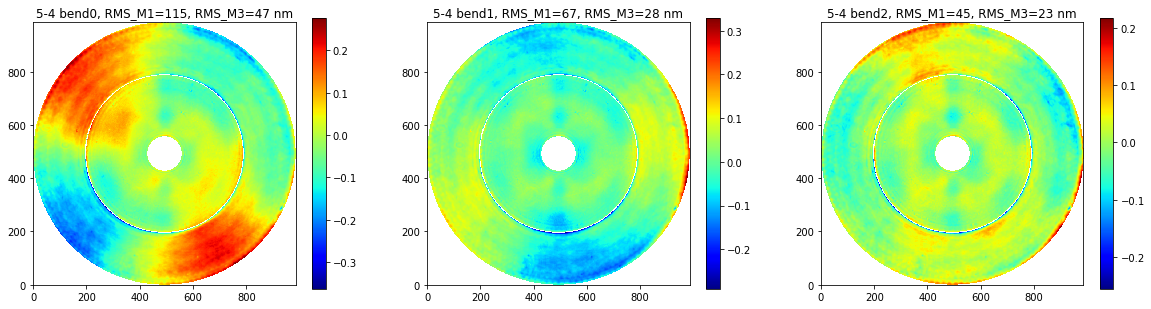

In [14]:
testID = '5-4'
iter = 'a'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
 
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])


/Users/bxin/largeData/M1M3_ML/Processed/190220_5-4a/M1M3 set0 190220 5-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190220_5-4a/M1M3 set1 190220 5-4M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190220_5-4a/M1M3 set2 190220 5-4M1M3 fit mode amps.csv


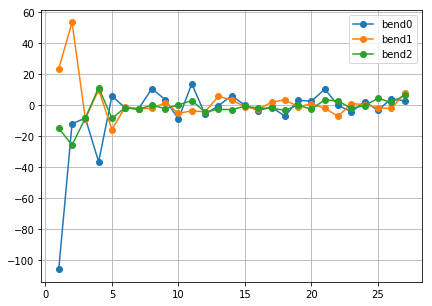

In [16]:
testID = '5-4'
iter = 'a'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(3):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

5-4 bend2 ------ irow = 0, icol = 0, -----------------------------
/Processed/190220_5-4b/M1 set2 190220 5-4.h5: Wed Feb 20 14:27:32 2019 
5-4 bend3 ------ irow = 0, icol = 1, -----------------------------
/Processed/190220_5-4b/M1 set3 190220 5-4.h5: Wed Feb 20 15:19:29 2019 
/Processed/190220_5-4b/M3 set3 190220 5-4.h5: Wed Feb 20 15:18:15 2019 


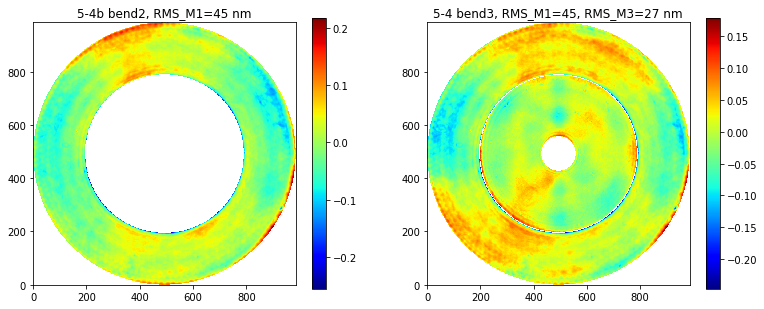

In [15]:
testID = '5-4'
iter = 'b'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(2,4):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[icol].imshow(m1s, origin='lowerleft')
        ax[icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])
fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190220_5-4b/M1 set2 190220 5-4 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190220_5-4b/M1M3 set3 190220 5-4M1M3 fit mode amps.csv


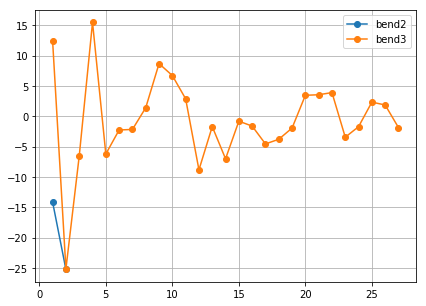

In [17]:
testID = '5-4'
iter = 'b'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(2,4):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 